Tan Shu Fei
7020466
CSCI361-A1-Task1

#### Import Pandas & Numpy libraries.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import array
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

#### Load csv dataset for Chronic Kidney Disease

In [2]:
disease = pd.read_csv('/Users/tanshufei/Documents/SIM/13.CSCI316 BD Mining Techniques Implementation/3. Assignments/A1 Individual/ckd-dataset-v2.csv')
disease.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [3]:
# Make a copy of disease dataframe 
d_copy = disease.copy()
f_copy = disease.copy()

In [4]:
# Get the shape of the data (202 rows & 29 cols)
disease.shape

(202, 29)

In [5]:
# Count the numer of empty (NaN, NAN, na) values in each column.
disease.isna().sum()

bp (Diastolic)    1
bp limit          1
sg                1
al                1
class             1
rbc               1
su                1
pc                1
pcc               1
ba                1
bgr               1
bu                1
sod               1
sc                1
pot               1
hemo              1
pcv               1
rbcc              1
wbcc              1
htn               1
dm                1
cad               1
appet             1
pe                1
ane               1
grf               1
stage             1
affected          0
age               0
dtype: int64

In [6]:
# Fill empty cells with int '0'
disease.fillna(0, inplace=True)

In [7]:
# Drop data the first 2 rows of data
disease = disease.drop(labels = [0,1], axis = 0)
disease.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
5,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
6,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [8]:
# Reset the index after removing
disease = disease.reset_index(drop=True)
disease.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [9]:
# Get the updated number of rows & cols
disease.shape

(200, 29)

In [10]:
# Count the numer of empty (NaN, NAN, na) values in each column.
disease.isna().sum()

bp (Diastolic)    0
bp limit          0
sg                0
al                0
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
stage             0
affected          0
age               0
dtype: int64

In [11]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  200 non-null    object
 1   bp limit        200 non-null    object
 2   sg              200 non-null    object
 3   al              200 non-null    object
 4   class           200 non-null    object
 5   rbc             200 non-null    object
 6   su              200 non-null    object
 7   pc              200 non-null    object
 8   pcc             200 non-null    object
 9   ba              200 non-null    object
 10  bgr             200 non-null    object
 11  bu              200 non-null    object
 12  sod             200 non-null    object
 13  sc              200 non-null    object
 14  pot             200 non-null    object
 15  hemo            200 non-null    object
 16  pcv             200 non-null    object
 17  rbcc            200 non-null    object
 18  wbcc      

/var/folders/k_/spkkzdw94rg_b58kztwm7vf80000gn/T/ipykernel_11275/1636699800.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,6))


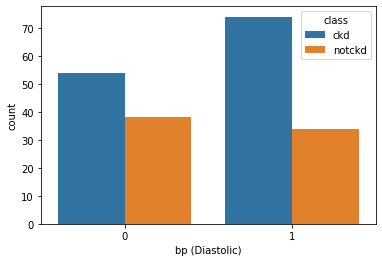

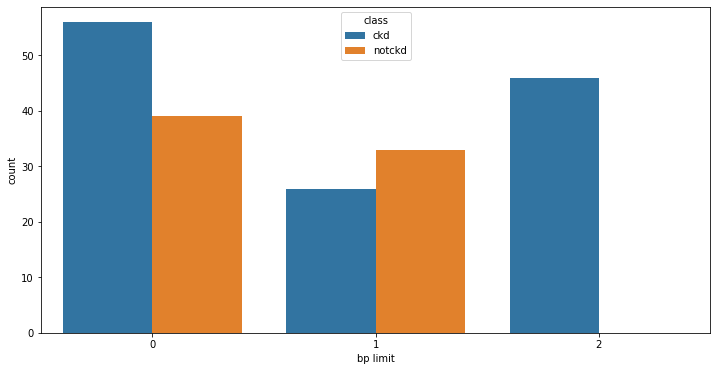

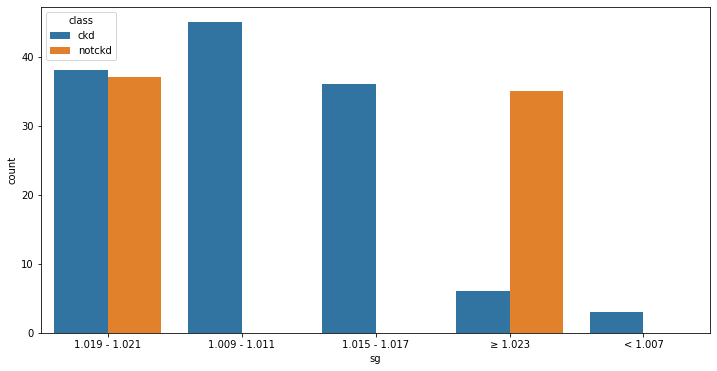

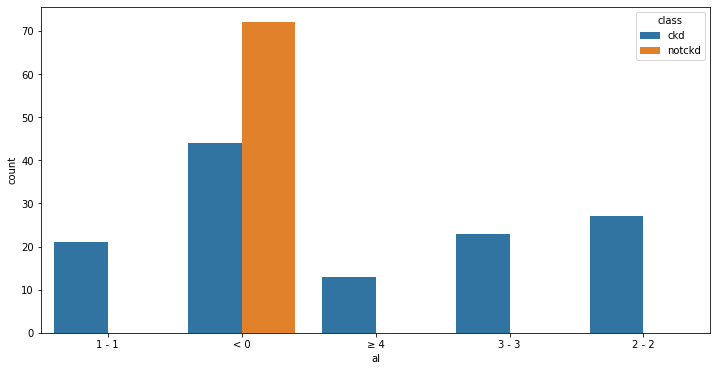

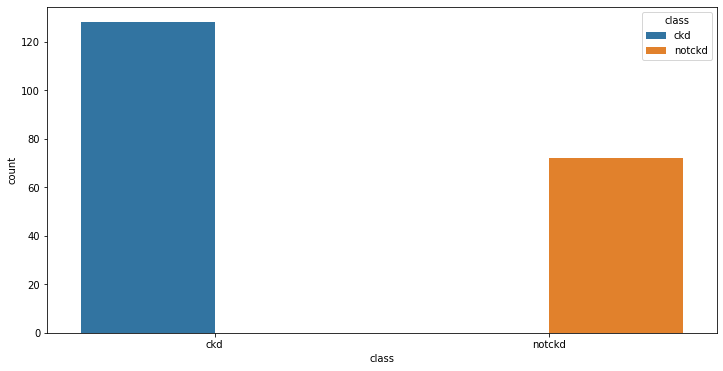

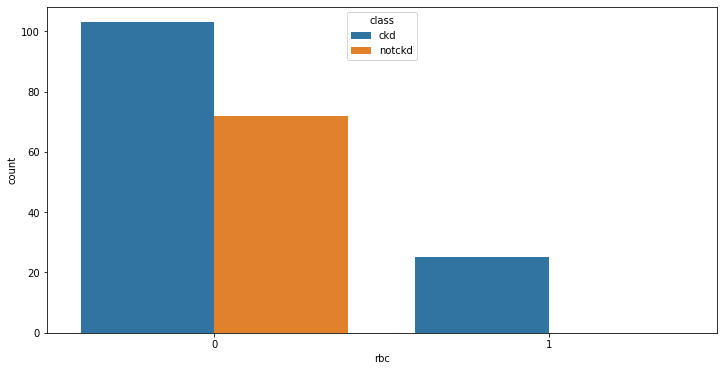

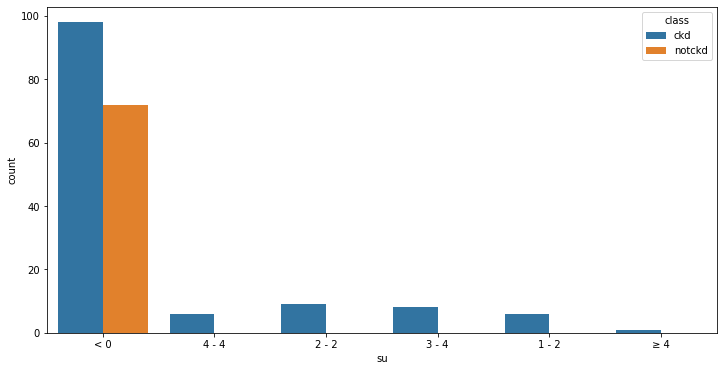

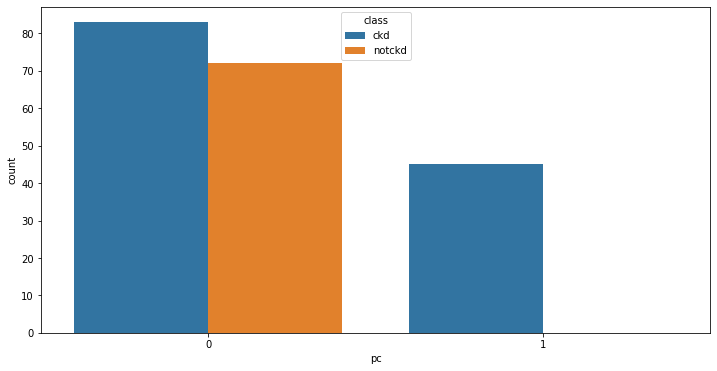

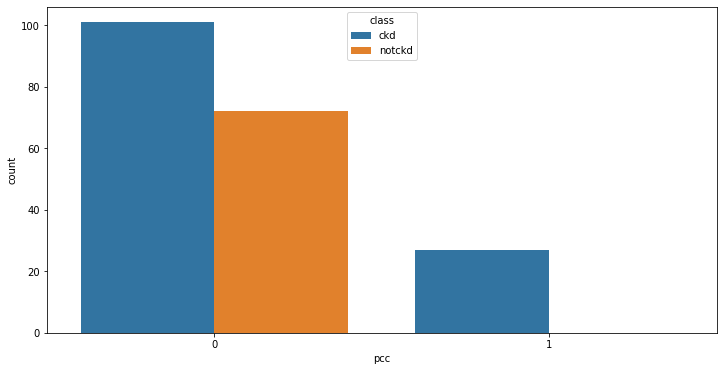

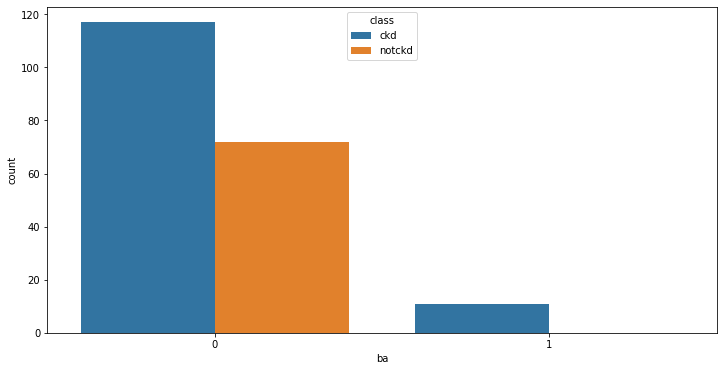

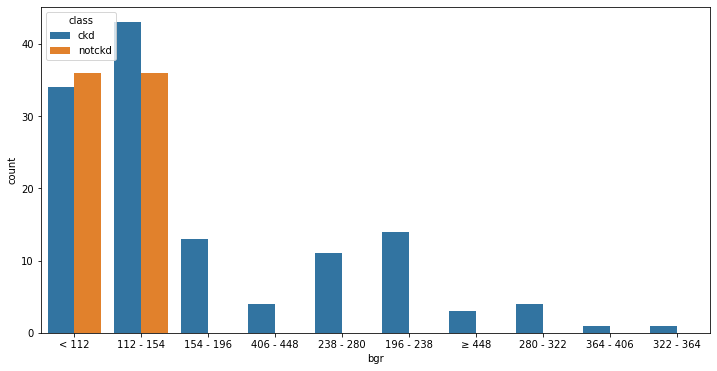

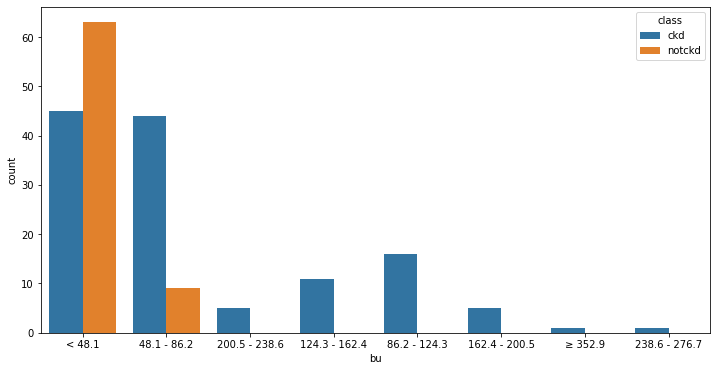

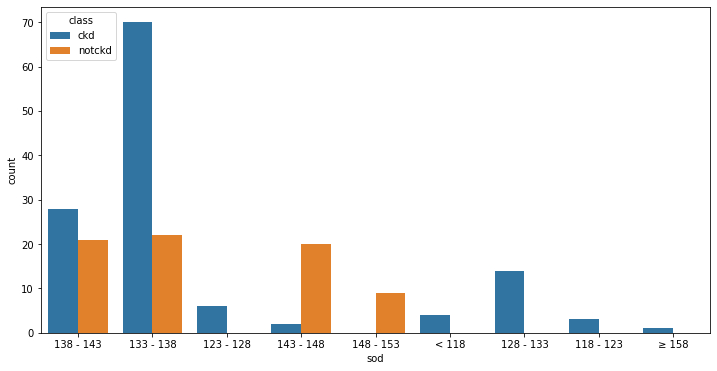

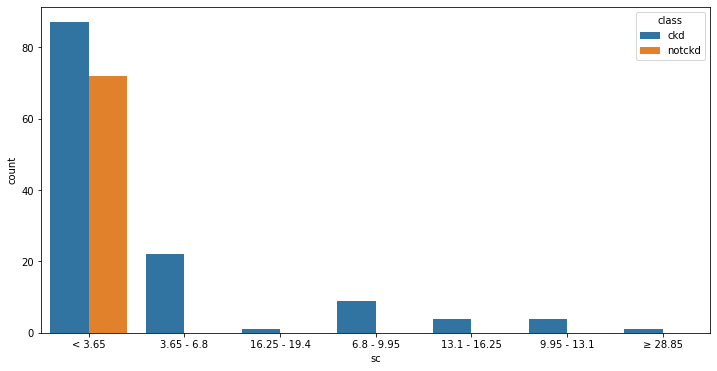

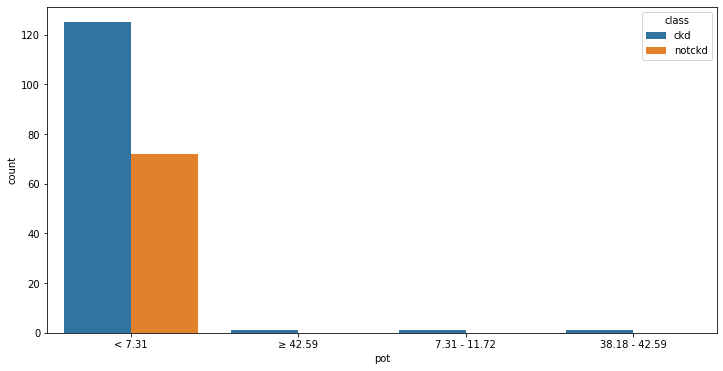

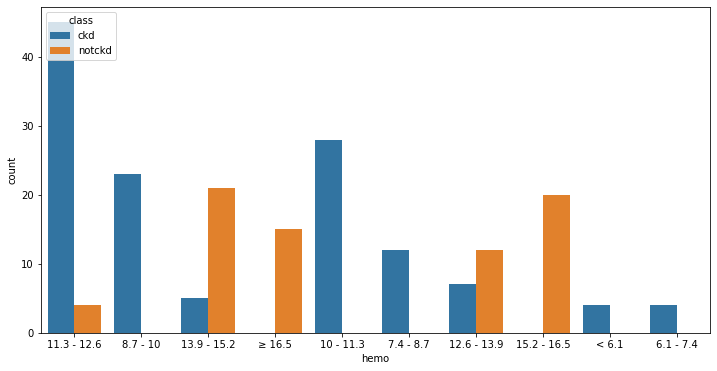

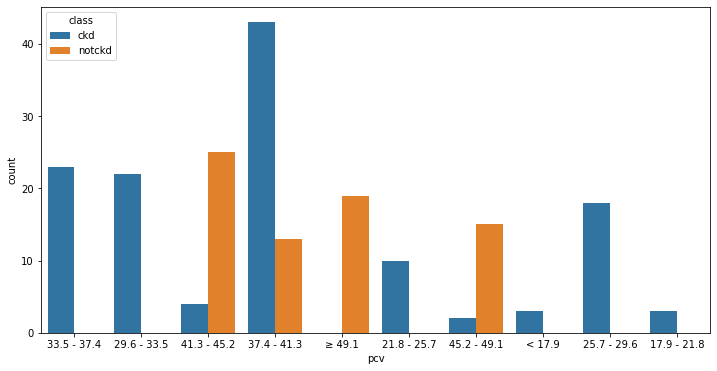

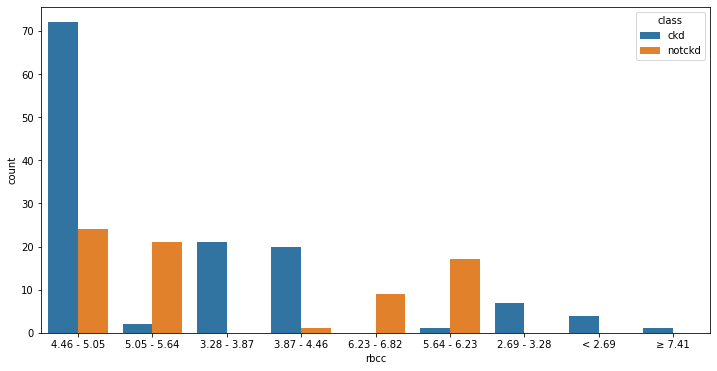

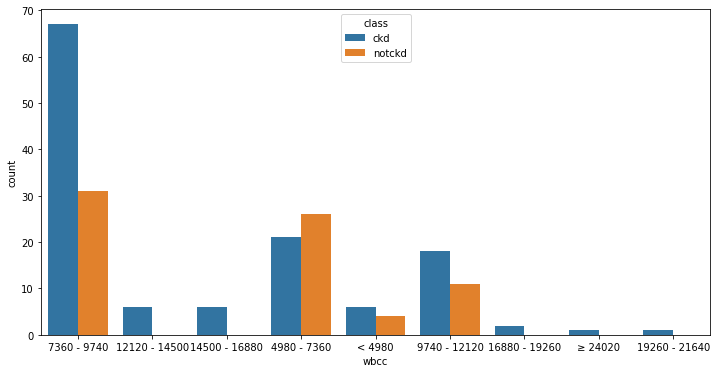

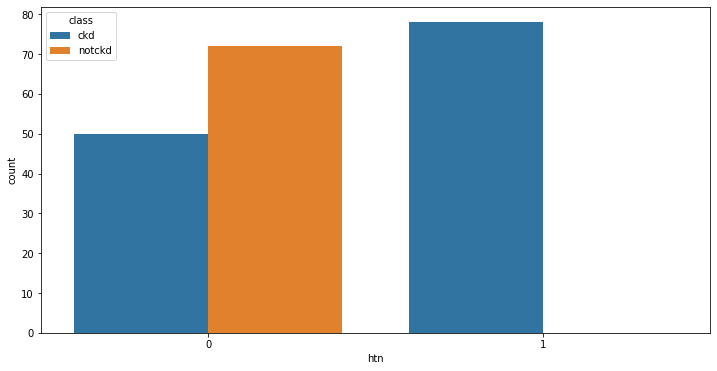

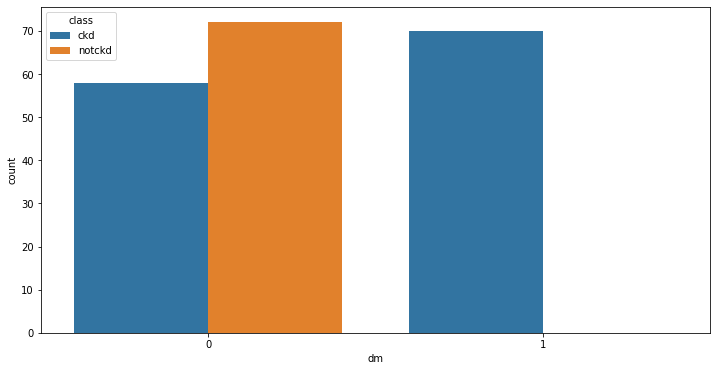

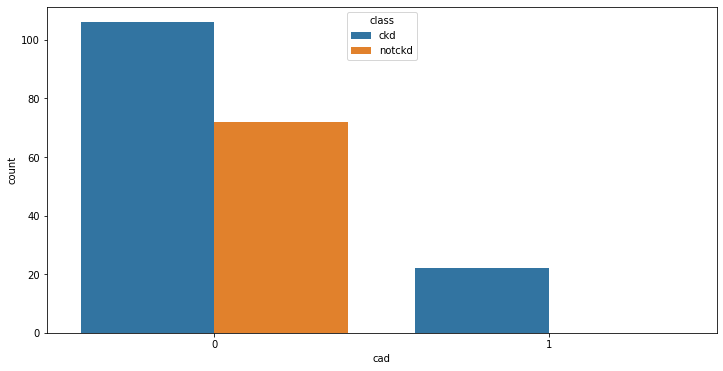

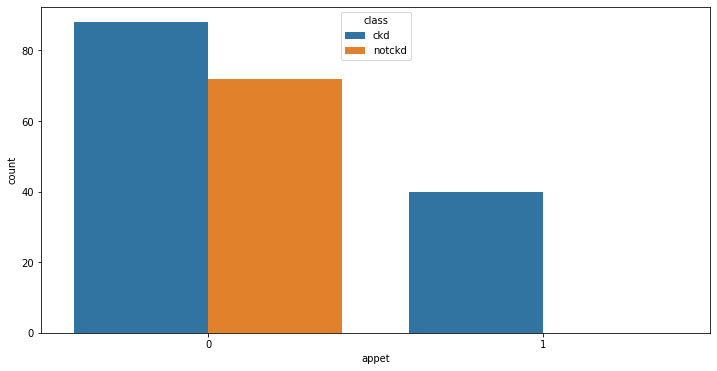

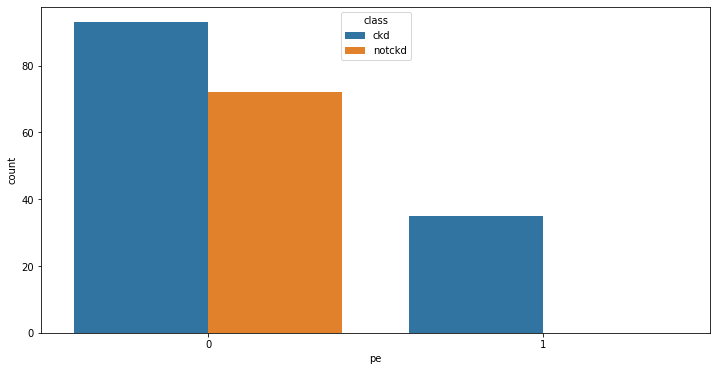

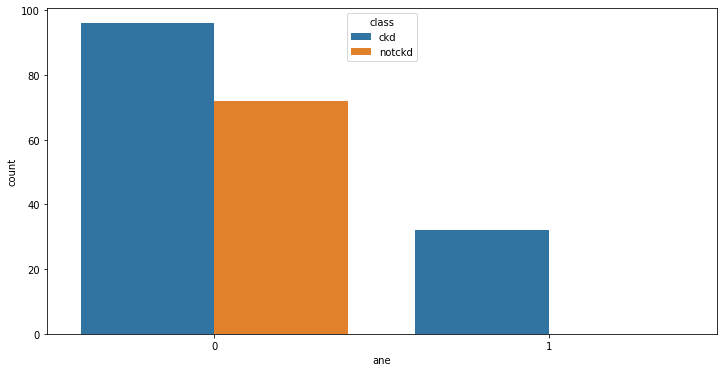

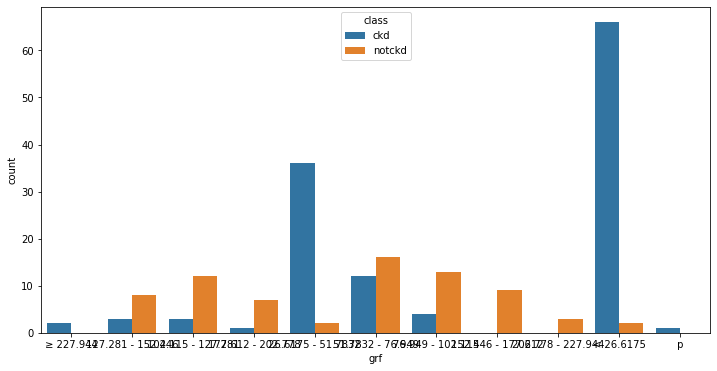

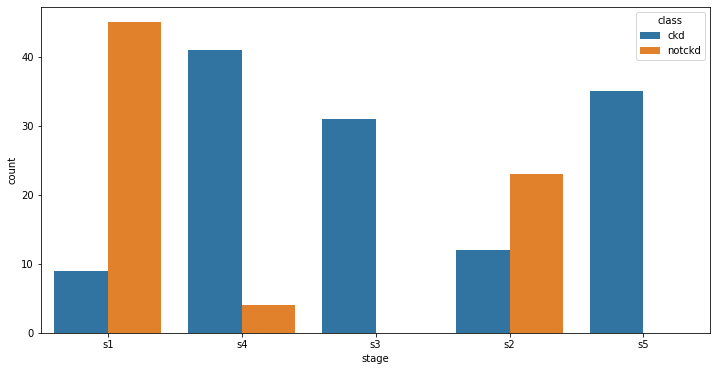

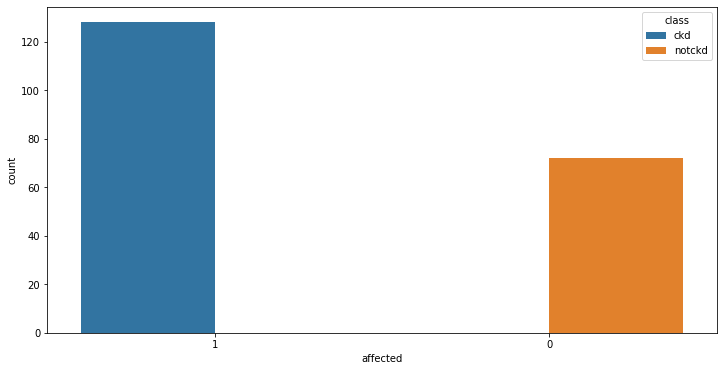

<Figure size 864x432 with 0 Axes>

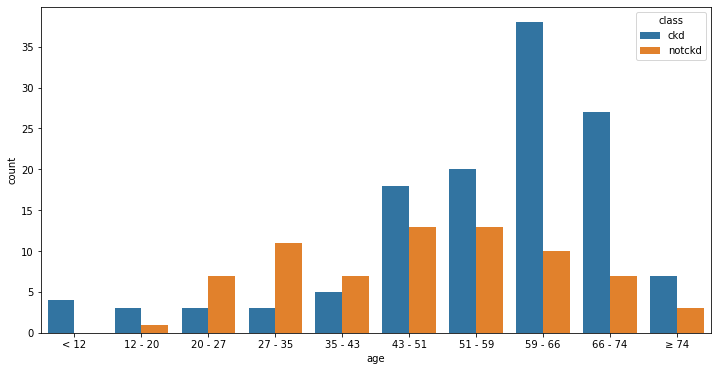

In [16]:
# Countplot of every variable with hue = class/target
for i, col in enumerate(disease.columns):
    plt.figure(figsize=(12,6))
    plt.figure(i)
    sns_plot = sns.countplot(x=col, hue='class', data=disease)
    

In [17]:
# Remove special chars
disease = disease.replace(r'\D+', '', regex=True)
disease.head(10)

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,10191021,11,,0,0,0,0,0,...,0,0,0,0,0,0,227944,1,1,12
1,0,0,10091011,0,,0,0,0,0,0,...,0,0,0,0,0,0,227944,1,1,12
2,0,0,10091011,4,,1,0,1,0,1,...,0,0,0,1,0,0,127281152446,1,1,12
3,1,1,10091011,33,,0,0,0,0,0,...,0,0,0,0,0,0,127281152446,1,1,12
4,0,0,10151017,0,,0,0,0,0,0,...,0,1,0,1,1,0,127281152446,1,1,1220
5,1,1,1023,0,,0,0,0,0,0,...,0,0,0,0,0,0,102115127281,1,0,1220
6,0,0,10191021,33,,0,0,0,0,0,...,1,1,0,0,0,0,177612202778,1,1,1220
7,0,0,10191021,0,,0,0,0,0,0,...,0,0,0,0,0,0,266175517832,4,1,1220
8,0,0,1023,0,,0,0,0,0,0,...,0,0,0,0,0,0,266175517832,4,0,2027
9,1,2,10091011,4,,0,0,1,1,1,...,0,0,0,0,0,1,51783276949,3,1,2027


### 2. Apply ordinal encoding to all columns containing numerical bins.

In [19]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_endocders import OrdinalEncoder

In [20]:
# Transform non-numeric columns into numerical columns
for columns in disease.columns:
        #if disease[columns].dtypes == np.number: # if it contains num
            #continue
        # if it does not contains num
        oe = OrdinalEncoder()
        disease[columns] = oe.fit_transform(disease[[columns]])

# Print first 5 rows of new dataset        
disease.head(10)

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,3.0,2.0,1.0,5.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,3.0,2.0,1.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0
2,0.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,6.0,4.0,3.0,2.0,9.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0
3,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,3.0,2.0,3.0,7.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
4,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,4.0,3.0,2.0,3.0,6.0,5.0,7.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0
5,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,3.0,2.0,5.0,9.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,3.0,2.0,0.0,4.0,2.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0
7,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0,2.0,1.0,6.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,1.0,1.0
8,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0,2.0,3.0,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,0.0,2.0
9,1.0,2.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,2.0,3.0,2.0,8.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,2.0,1.0,2.0


### 3. One-Hot-Encoding to the "stage" column.

In [21]:
# Drop data the first 2 rows of data
d_copy = d_copy.drop(labels = [0,1], axis = 0)

In [22]:
# Reset the index after removing
d_copy = d_copy.reset_index(drop=True)

In [23]:
# Pass 'stage' cols from disease to var stage_enc
stage_enc = d_copy['stage']
stage_enc

0      s1
1      s1
2      s1
3      s1
4      s1
       ..
195    s3
196    s4
197    s2
198    s1
199    s4
Name: stage, Length: 200, dtype: object

In [24]:
# Create instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

In [25]:
# Passing 'stage' column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(disease[['stage']]).toarray())
enc_df 

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
195,0.0,0.0,1.0,0.0,0.0
196,0.0,0.0,0.0,1.0,0.0
197,0.0,1.0,0.0,0.0,0.0
198,1.0,0.0,0.0,0.0,0.0


In [26]:
# merge with main df bridge_df on key values
stage_cols = d_copy.loc[:10,["stage"]]
stage_cols 

,stage
0,s1
1,s1
2,s1
3,s1
4,s1
5,s1
6,s1
7,s4
8,s4
9,s3


In [27]:
# Join stage cols & one-hot-encoding data together
enc_disease = stage_cols.join(enc_df)
enc_disease

,stage,0,1,2,3,4
0,s1,1.0,0.0,0.0,0.0,0.0
1,s1,1.0,0.0,0.0,0.0,0.0
2,s1,1.0,0.0,0.0,0.0,0.0
3,s1,1.0,0.0,0.0,0.0,0.0
4,s1,1.0,0.0,0.0,0.0,0.0
5,s1,1.0,0.0,0.0,0.0,0.0
6,s1,1.0,0.0,0.0,0.0,0.0
7,s4,0.0,0.0,0.0,1.0,0.0
8,s4,0.0,0.0,0.0,1.0,0.0
9,s3,0.0,0.0,1.0,0.0,0.0


### 4. Find out and rank the correlations between the “class” column and all other columns

In [28]:
class_cols = d_copy['class']
class_cols

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
195       ckd
196       ckd
197    notckd
198    notckd
199       ckd
Name: class, Length: 200, dtype: object

In [29]:
# Display all the columns names by default
pd.set_option('display.max_columns', None)
d_copy.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,< 112,< 48.1,138 - 143,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,< 3.65,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,41.3 - 45.2,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,154 - 196,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,37.4 - 41.3,5.05 - 5.64,7360 - 9740,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [30]:
# Transform non-numeric columns into numerical columns
for columns in d_copy.columns:
        # if it does not contains num
        oe = OrdinalEncoder()
        disease[columns] = oe.fit_transform(disease[["class"]])

# Print first 5 rows of new dataset        
disease.head(10)

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Find correlation between 'class' column against other columns
# How a variable change will affect the change of other variable
# The closer to (abs) 1 the better

#d_copy[d_copy.columns[1:-1]].apply(lambda x:x.corr(d_copy["class"]))